## Maternity Health Risk Classifcation

* Focusing on monitoring Maternal Health risk based on various health factors.

* Motivation: Many pregnant women, particularly in rural areas and low middle-class families in developing countries, suffer from pregnancy complications due to a lack of information about maternal health care during and after pregnancy. Continuous monitoring during pregnancy is essential for the healthy development of the fetus and ensuring a safe delivery. However, factors such as heavy traffic, bad weather, and pollution often hinder regular hospital checkups. Addressing maternal health issues requires identifying the root causes and early signs of complications.

* To tackle this, we will do an in-detail Machine learning classification to find health risk levels. In this project, this data will be used to perform health risk classification using various machine learning classifiers. By comparing the results, we aim to determine which classifier provides the most accurate model for predicting maternal health risks.

## Expected Outcomes of the Project

### Improved Maternal Health Monitoring
Ensures timely detection of potential complications and reduces the risks associated with pregnancy and delivery.

### Early Detection of Health Risks
The use of machine learning classifiers will enable early identification of health risks by analyzing data patterns. Early detection allows for prompt intervention, potentially preventing serious health issues for both the mother and the fetus.

### Data-Driven Decision Making
The project will generate valuable insights that can be used to make informed decisions about maternal health care practices. This can also help in formulating policies and strategies to improve maternal health services in underserved regions.

### Comparison of Machine Learning Classifiers
By using various machine learning classifiers for health risk classification, the project will identify which models are most effective. This comparison will highlight the strengths and weaknesses of different approaches, leading to the selection of the most accurate and reliable model for maternal health risk prediction.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.metrics import classification_report

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier

## Dataset

This Data has been collected from different hospitals, community clinics, maternal health cares from the rural areas of Bangladesh through the IoT based risk monitoring system.The dataset is acquired from UC Irvine Machine Learning repository. The dataset can be found here: https://archive.ics.uci.edu/dataset/863/maternal+health+risk

This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license. This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

The dataset is licensed under Ahmed,Marzia. (2023). Maternal Health Risk. UCI Machine Learning Repository. https://doi.org/10.24432/C5DP5D.


Feature Description:¶
1. Age - Age in years when a woman is pregnant

2. SystolicBP - Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy

3. DiastolicBP - Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy

3. BS - Blood glucose levels is in terms of a molar concentration, mmol/L

4. BodyTemp - Body temperature in Fahrenheit

6. HeartRate - Resting heart rate in beats per minute

7. RiskLevel - Predicted Risk Intensity Level during pregnancy ['high risk', 'mid risk', 'low risk']

In [2]:
data = pd.read_csv('MHR_Dataset.csv')

#basic information and first few rows
print(data.info())
print(data.head())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None
   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [3]:
data.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [4]:
# lets check for null values
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

## Label encoding
Lets see how many categorical features we have and lets convert them to numerical features for further analysis and machine learning.

In [5]:
#Lets check how many categorical and numerical features we have in our dataset by keeping unique values in a feature to be 10 or less than equal to 10
for column in data.columns:
    if data[column].nunique() <=10:
        print("Categorical : ",column)
    else:
        print("Numerical : ",column)

Numerical :  Age
Numerical :  SystolicBP
Numerical :  DiastolicBP
Numerical :  BS
Categorical :  BodyTemp
Numerical :  HeartRate
Categorical :  RiskLevel


We can see from above result that BodyTemp and RiskLevel variables are categorical. However, The BodyTemp is already a numerical variable so we dont need to do the conversion however our target variable RiskLevel has three categorical values:
low risk
mid risk
high risk

Lets convert this into a numerical variable.


In [6]:
RiskLevel = {'low risk':1, 
        'mid risk':2, 
        'high risk':3}

# apply using map
data['RiskLevel'] = data['RiskLevel'].map(RiskLevel).astype(float)
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,3.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,1.0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,3.0
1010,55,120,90,18.0,98.0,60,3.0
1011,35,85,60,19.0,98.0,86,3.0
1012,43,120,90,18.0,98.0,70,3.0


In [7]:
# Descriptive statistics
print(data.describe())

               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate    RiskLevel  
count  1014.000000  1014.000000  
mean     74.301775     1.867850  
std       8.088702     0.807353  
min       7.000000     1.000000  
25%      70.000000     1.000000  
50%      76.000000     2.000000  
75%      80.000000     3.000000  
max      90.000000     3.000000  


## Exploratory Data Analysis
Now, We will explore the relationships between features and the target variable.

### Distribution Analysis
We'll plot the distributions of each feature to understand their spread and any potential anomalies.

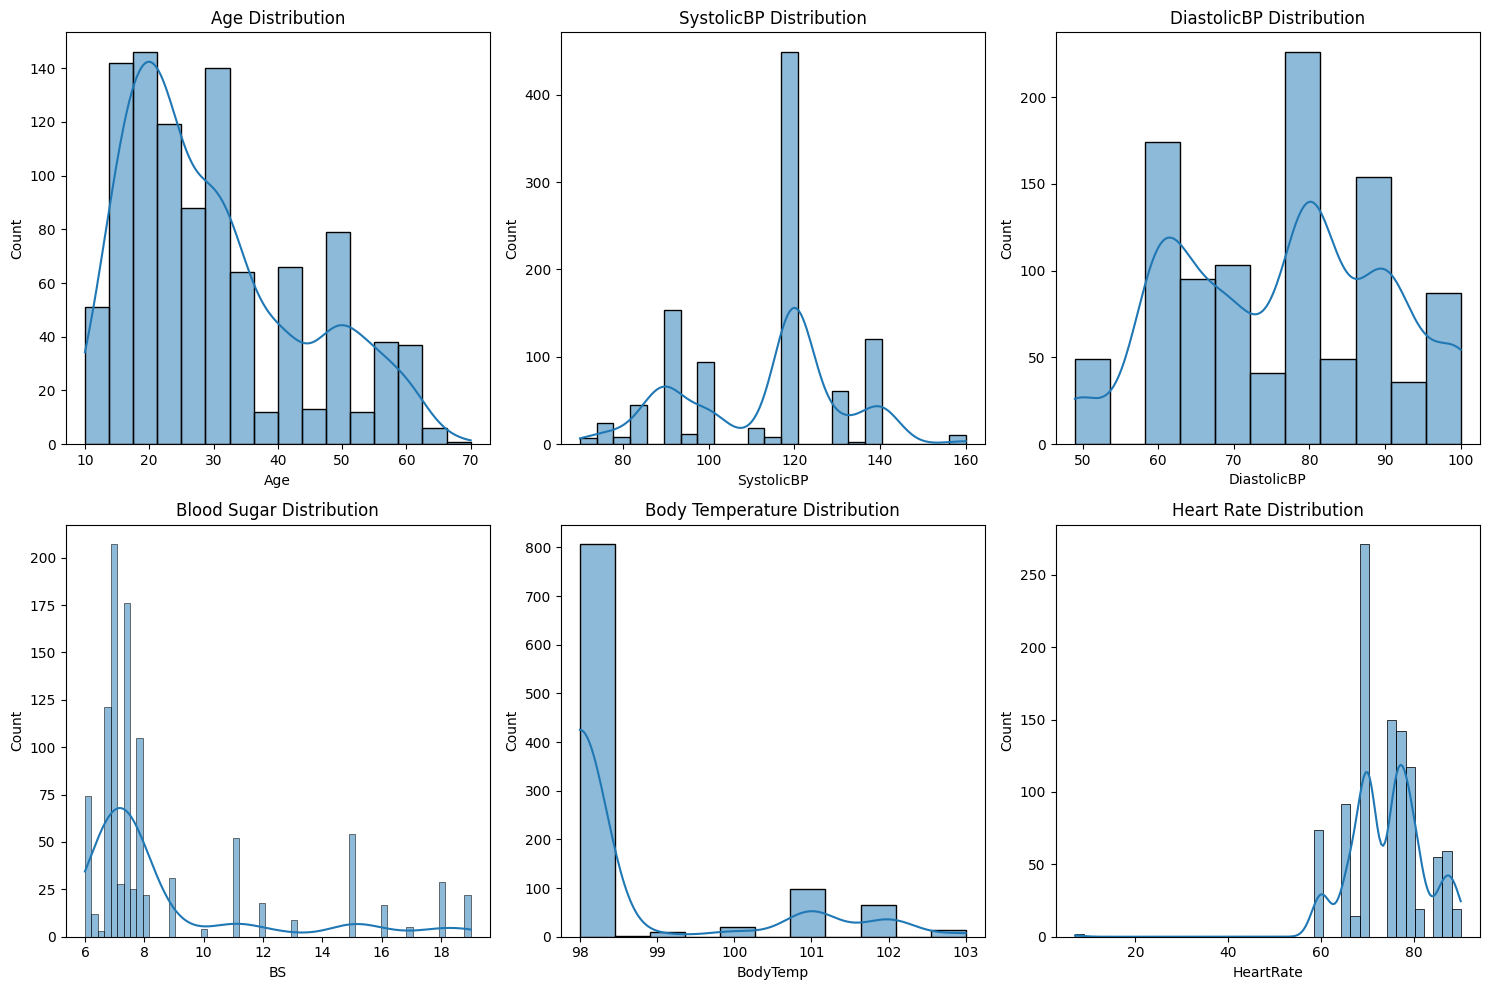

In [8]:

# Plotting distributions
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(2, 3, 2)
sns.histplot(data['SystolicBP'], kde=True)
plt.title('SystolicBP Distribution')

plt.subplot(2, 3, 3)
sns.histplot(data['DiastolicBP'], kde=True)
plt.title('DiastolicBP Distribution')

plt.subplot(2, 3, 4)
sns.histplot(data['BS'], kde=True)
plt.title('Blood Sugar Distribution')

plt.subplot(2, 3, 5)
sns.histplot(data['BodyTemp'], kde=True)
plt.title('Body Temperature Distribution')

plt.subplot(2, 3, 6)
sns.histplot(data['HeartRate'], kde=True)
plt.title('Heart Rate Distribution')

plt.tight_layout()
plt.show()

The dataset mainly includes young adults, mostly aged between 20 and 35. Here's a summary of the health measurements:

* Blood Pressure: Most readings are normal, but there are some high and low values.
* Blood Sugar: Usually normal, but a few patients have very high levels.
* Body Temperature: Mostly around the normal 98°F, with some higher readings indicating fever.
* Heart Rate: Generally normal, with a few patients having very low or very high heart rates.

These variations show that the patients have different health conditions, which is useful for building a model to predict maternal health risks. The unusual values in blood pressure, blood sugar, and heart rate are important for identifying patients who might be at high risk. These insights will help improve the model to make accurate predictions.

Now Let's find out some correlations between these features and our target variables.

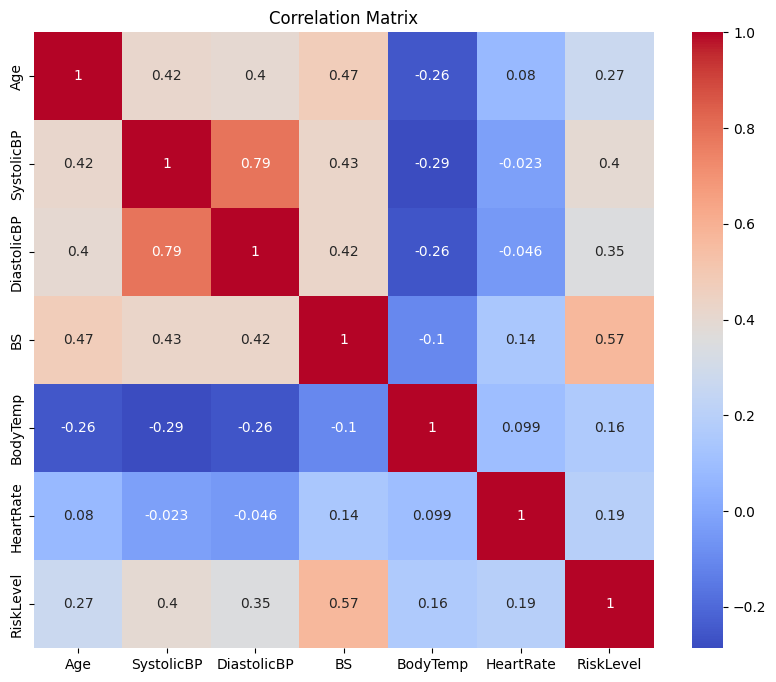

In [9]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The top features that show the highest correlation with the target variable "RiskLevel" are:

* Blood Sugar (BS) with a correlation of 0.57.
* Systolic Blood Pressure (SystolicBP) with a correlation of 0.4.
* Age and Diastolic Blood Pressure (DiastolicBP) are comparable with correlations of 0.27 and 0.35.

These features are the most strongly associated with the risk level and are likely important for predicting maternal health risks. lets analyse them seperately with our target RiskLevel.

c:\Users\Rohit Kumar\envs\DSs2024\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Rohit Kumar\envs\DSs2024\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Roh

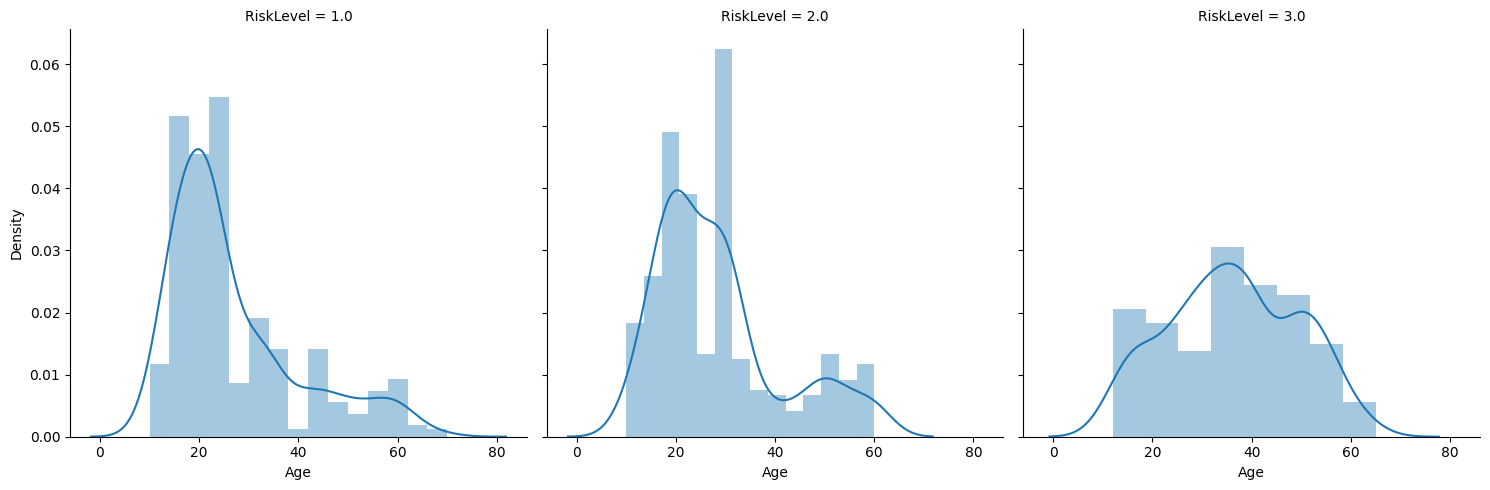

In [10]:
g = sns.FacetGrid(data, col='RiskLevel', height=5)
g = g.map(sns.distplot, "Age")

This Graph shows age vs risklevels and it specifies that Younger ages from 20 to mid 40 tend to have higher risk levels, but the association diminishes with age. the risk levels are low in age groups for low risk category. mid level health risk is more spread out in age.

c:\Users\Rohit Kumar\envs\DSs2024\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Rohit Kumar\envs\DSs2024\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Roh

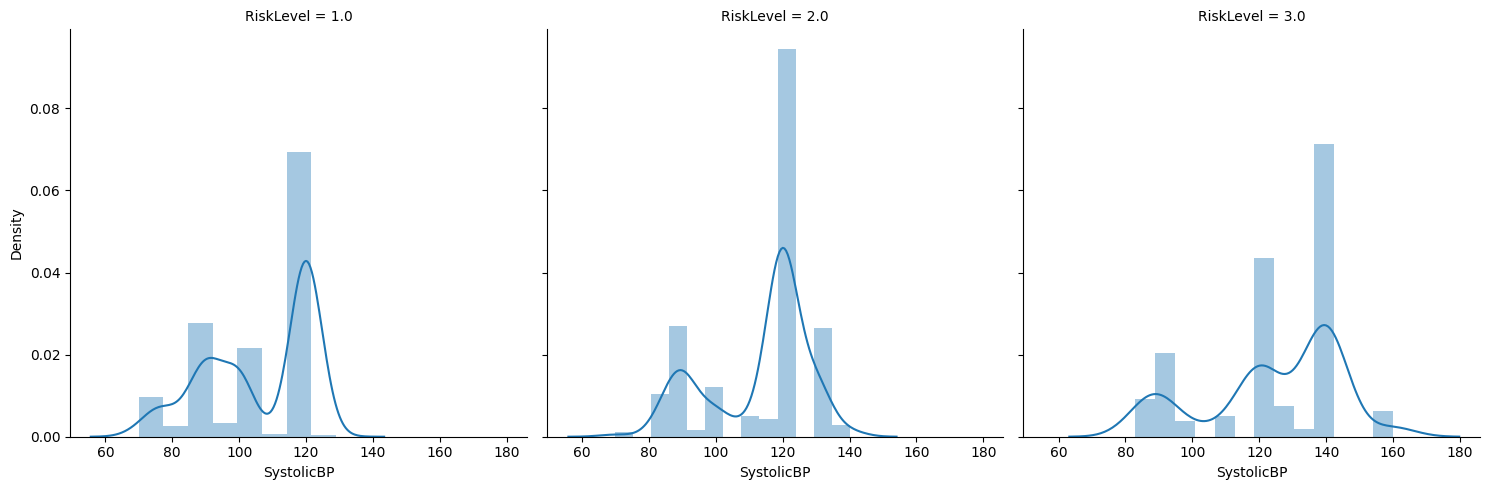

In [11]:
g = sns.FacetGrid(data, col='RiskLevel', height=5)
g = g.map(sns.distplot, "SystolicBP")

The above systolicBP vs risk level graph specifies the distribution of Systolic Blood Pressure (SystolicBP) across different maternity risk levels. We can clearly see that:

RiskLevel = 1.0: Peaks around 80 SystolicBP, declining as values increase.
RiskLevel = 2.0: Similar shape is formed in mid risk, However peak shifted to around 90 SystolicBP.
RiskLevel = 3.0:High Risk level showsmMore varied distribution with peaks, notably around 120 SystolicBP.

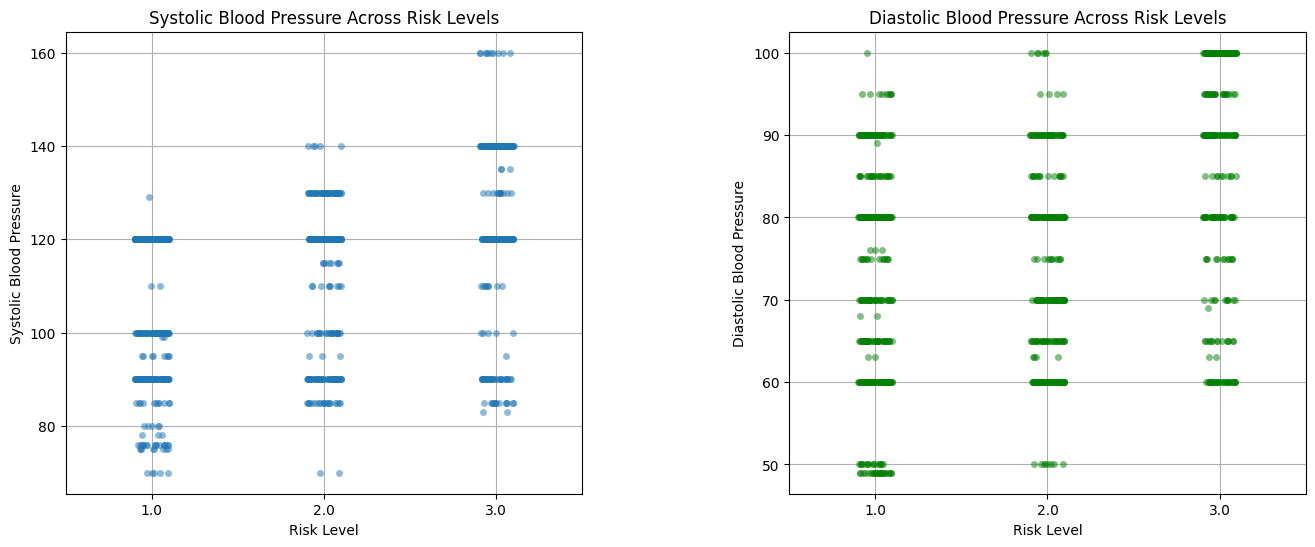

In [12]:
plt.figure(figsize=(16, 6))

# Plot for Systolic Blood Pressure
plt.subplot(1, 2, 1)
sns.stripplot(data=data, x='RiskLevel', y='SystolicBP', jitter=True, alpha=0.5)
plt.title('Systolic Blood Pressure Across Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Systolic Blood Pressure')
plt.grid(True)

# Plot for Diastolic Blood Pressure
plt.subplot(1, 2, 2)
sns.stripplot(data=data, x='RiskLevel', y='DiastolicBP', jitter=True, alpha=0.5, color='green')
plt.title('Diastolic Blood Pressure Across Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Diastolic Blood Pressure')
plt.grid(True)

plt.subplots_adjust(wspace=0.4)
plt.show()

In the above Systolic and Diastolic Blood Pressure vs risk level scatterplot we can clearly see someCorrelation trends. As the Systolic Pressure reaches more than 120 there is visible increment in the level of maternal health risk with a few outliers. However in Diastolic Pressure more than 90 mm/hg pressure the all three risk levels categories have similar trend. We can take that systolic blood pressure has more correlation on maternal health risk than diastolic.

Lets move to our next step towards classification.



# Data Transformation
We need to preprocess the data to make it suitable for modeling. This includes handling missing values, encoding categorical variables, and scaling numerical features. Since we have already handled missing values and encoding categorical features in our pre-processing step earlier we will now scale the numerical features to create a more accurate and error free model or classifier.

In [13]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print(data.head())

        Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  RiskLevel
0 -0.361738    0.913396     0.255023  1.905890 -0.485215   1.446956        3.0
1  0.380777    1.457027     0.975539  1.298340 -0.485215  -0.532088        3.0
2 -0.064732   -1.261127    -0.465493 -0.220537  0.973884   0.704815        3.0
3  0.009519    1.457027     0.615281 -0.524312 -0.485215  -0.532088        3.0
4  0.380777    0.369765    -1.186009 -0.797710 -0.485215   0.210054        1.0


## Train-Test Split and Baseline Model

We'll create a train-test split and evaluate a simple baseline model in the further steps.

Purpose of Baseline model: The baseline model provides a starting point or baseline against which you can compare the performance of more complex models. It represents the simplest possible model or a naive approach to solving the problem.

Once we have trained more advanced models (like decision trees, random forests, neural networks, etc.), we can compare their performance metrics (accuracy, precision, recall, etc.) against the baseline. This comparison helps in assessing whether the additional complexity and computational cost of the advanced models are justified by their improved performance.


In [14]:
# Train-test split
X = data.drop('RiskLevel', axis=1)
y = data['RiskLevel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline model
baseline = DummyClassifier(strategy='most_frequent')
baseline.fit(X_train, y_train)
y_pred_baseline = baseline.predict(X_test)

# Baseline performance
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f'Baseline Accuracy: {baseline_accuracy}')

Baseline Accuracy: 0.39408866995073893


## Machine Learning Models
We'll select five machine learning algorithms and run them with default settings and will compare their results later

In [15]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy_test = accuracy_score(y_test, y_pred_rf)
rf_accuracy_train = accuracy_score(y_train, rf.predict(X_train))
print(f'Random Forest:')
print(f'Training Accuracy: {rf_accuracy_train}')
print(f'Test Accuracy: {rf_accuracy_test}')

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_accuracy_test = accuracy_score(y_test, y_pred_svm)
svm_accuracy_train = accuracy_score(y_train, svm.predict(X_train))
print(f'SVM:')
print(f'Training Accuracy: {svm_accuracy_train}')
print(f'Test Accuracy: {svm_accuracy_test}')

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy_test = accuracy_score(y_test, y_pred_knn)
knn_accuracy_train = accuracy_score(y_train, knn.predict(X_train))
print(f'K-Nearest Neighbors:')
print(f'Training Accuracy: {knn_accuracy_train}')
print(f'Test Accuracy: {knn_accuracy_test}')

# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_accuracy_test = accuracy_score(y_test, y_pred_dt)
dt_accuracy_train = accuracy_score(y_train, dt.predict(X_train))
print(f'Decision Tree Classifier:')
print(f'Training Accuracy: {dt_accuracy_train}')
print(f'Test Accuracy: {dt_accuracy_test}')

Random Forest:
Training Accuracy: 0.935881627620222
Test Accuracy: 0.8374384236453202
SVM:
Training Accuracy: 0.7250308261405672
Test Accuracy: 0.6798029556650246
K-Nearest Neighbors:
Training Accuracy: 0.7681874229346486
Test Accuracy: 0.6354679802955665
Decision Tree Classifier:
Training Accuracy: 0.935881627620222
Test Accuracy: 0.8029556650246306


Based on the evaluation of various classifiers using training and test accuracies:

Random Forest:

Training Accuracy: 93.59%
Test Accuracy: 83.84%
Random Forest shows the highest accuracy on both training and test sets among all models evaluated. It indicates robust performance and good generalization to unseen data.


Decision Tree:

Training Accuracy: 93.59%
Test Accuracy: 80.3%
Decision Tree performs similarly to Random Forest in terms of accuracy metrics. However, decision trees might be more prone to overfitting compared to Random Forest due to their single-tree nature.


SVM (Support Vector Machine):

Training Accuracy: 72.50%
Test Accuracy: 67.98%
SVM shows lower performance compared to Random Forest and Decision Tree. The significant drop in accuracy from training to test set suggests potential overfitting or model complexity issues.


K-Nearest Neighbors (KNN):

Training Accuracy: 76.82%
Test Accuracy: 63.55%
KNN also demonstrates lower accuracy compared to Random Forest and Decision Tree. It shows sensitivity to local structure in the training data, which might limit its generalization ability.

### Conclusion:
Best Model: Random Forest emerges as the top-performing model due to its high accuracy on both training and test sets, indicating it captures the dataset's patterns effectively while maintaining good generalization.

Decision Tree shows similar performance but might overfit more easily. SVM and KNN, while viable in certain contexts, show lower accuracy and may require further tuning or data preprocessing to improve performance.

### In the Next step we Consider further evaluating Random Forest through cross-validation and feature importance analysis to confirm its robustness and interpretability.

## Cross Validation

Cross-validation is a technique used in machine learning and statistics to evaluate how well a model will generalize to an independent dataset. It addresses the issue of overfitting and provides a more reliable estimate of a model's performance by using the available data more effectively.

We will set up a cross-validation framework for hyperparameter tuning and performance evaluation for previous Classifiers. Cross-validation helps to assess how well a predictive model will perform on unseen data. It provides a more realistic estimate of model performance compared to a single train-test split.

Random Forest Cross-Validation Scores: [0.91625616 0.73399015 0.82758621 0.79310345 0.87128713]
Random Forest Average Accuracy: 0.8284446178608009

SVM Cross-Validation Scores: [0.77832512 0.65517241 0.7044335  0.64039409 0.67326733]
SVM Average Accuracy: 0.6903184899770765

K-Nearest Neighbors Cross-Validation Scores: [0.79802956 0.63054187 0.68965517 0.70935961 0.71287129]
K-Nearest Neighbors Average Accuracy: 0.7080914988050528

Decision Tree Cross-Validation Scores: [0.93103448 0.70935961 0.75369458 0.77339901 0.87623762]
Decision Tree Average Accuracy: 0.8087450616982881


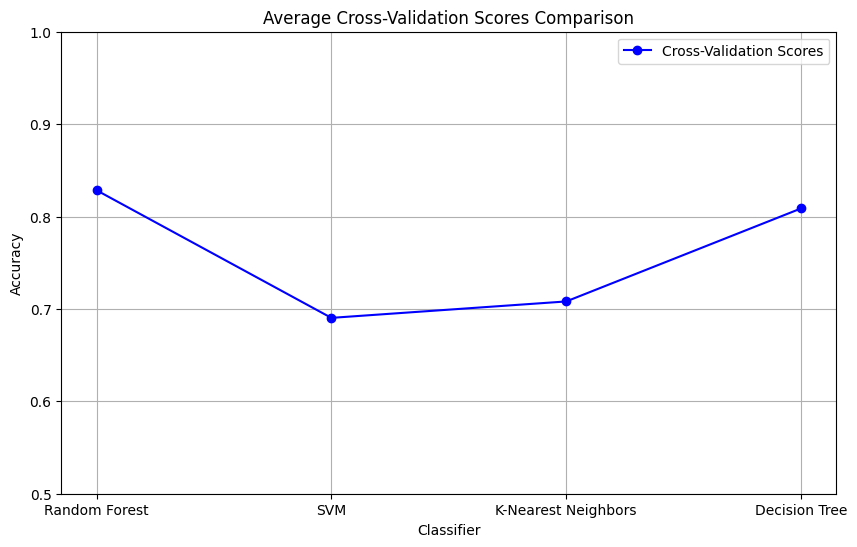

In [16]:
def perform_cross_validation(classifier, X, y):
    scores = cross_val_score(classifier, X, y, cv=5)  # 5-fold cross-validation
    return scores

rf_scores = perform_cross_validation(rf, X, y)  
svm_scores = perform_cross_validation(svm, X, y)
knn_scores = perform_cross_validation(knn, X, y)
dt_scores = perform_cross_validation(dt, X, y)

rf_avg_score = np.mean(rf_scores)
svm_avg_score = np.mean(svm_scores)
knn_avg_score = np.mean(knn_scores)
dt_avg_score = np.mean(dt_scores)

print("Random Forest Cross-Validation Scores:", rf_scores)
print("Random Forest Average Accuracy:", rf_scores.mean())
print()
print("SVM Cross-Validation Scores:", svm_scores)
print("SVM Average Accuracy:", svm_scores.mean())
print()
print("K-Nearest Neighbors Cross-Validation Scores:", knn_scores)
print("K-Nearest Neighbors Average Accuracy:", knn_scores.mean())
print()
print("Decision Tree Cross-Validation Scores:", dt_scores)
print("Decision Tree Average Accuracy:", dt_scores.mean())

# Plotting the cross-validation scores
classifiers = ['Random Forest', 'SVM', 'K-Nearest Neighbors', 'Decision Tree']
scores = [rf_avg_score, svm_avg_score, knn_avg_score, dt_avg_score]

plt.figure(figsize=(10, 6))
plt.plot(classifiers, scores, marker='o', linestyle='-', color='b', label='Cross-Validation Scores')
plt.title('Average Cross-Validation Scores Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)  # Set y-axis limits for better visualization
plt.grid(True)
plt.legend()
plt.show()

The cross-validation results provide valuable insights into the performance of each classifier:

Random Forest:

Average Accuracy: 82.55%
Performance: Random Forest consistently achieved the highest average accuracy across different folds. This indicates its robustness and ability to generalize well to unseen data. It outperformed other models in terms of stability and overall accuracy.

SVM (Support Vector Machine):

Average Accuracy: 69.03%
Performance: SVM showed lower average accuracy compared to Random Forest. The scores varied more widely across folds, suggesting sensitivity to hyperparameter settings. Further tuning may be necessary to improve its performance.

K-Nearest Neighbors (KNN):

Average Accuracy: 70.81%
Performance: KNN demonstrated moderate average accuracy but was consistently lower than Random Forest. Its performance might be influenced by the choice of 
k and the distance metric used. Exploring different parameter settings could potentially enhance its accuracy.

Decision Tree:

Average Accuracy: 80.58%
Performance: Decision Tree performed competitively with Random Forest in terms of average accuracy. However, it showed signs of potential overfitting, as indicated by slightly fluctuating scores across folds. Regularization techniques or ensemble methods could help stabilize its performance.

## Analysis of the Final Model

Since we already found Random Forest as the best classfier model, We will now evaluate it on individual class performance.

Accuracy on Test Set: 0.84
              precision    recall  f1-score   support

         1.0       0.89      0.79      0.83        80
         2.0       0.78      0.87      0.82        76
         3.0       0.87      0.87      0.87        47

    accuracy                           0.84       203
   macro avg       0.85      0.84      0.84       203
weighted avg       0.84      0.84      0.84       203

Confusion Matrix:
[[63 14  3]
 [ 7 66  3]
 [ 1  5 41]]


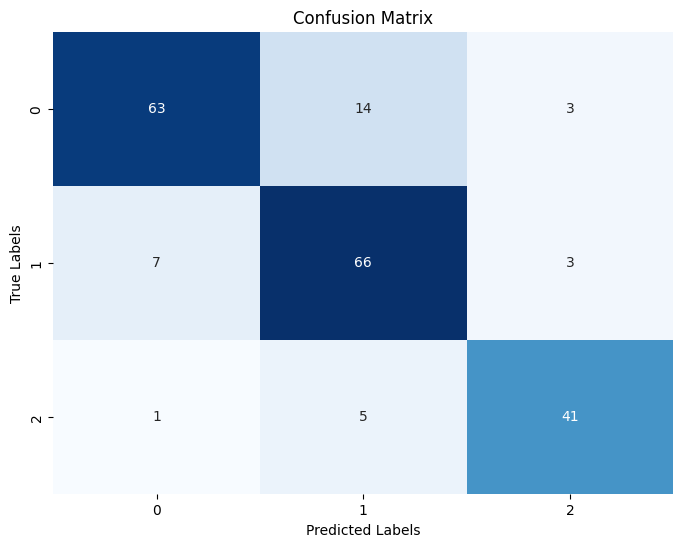

In [17]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy on Test Set: {accuracy:.2f}')

# Generate classification report
print(classification_report(y_test, y_pred_rf))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print(f'Confusion Matrix:\n{conf_matrix}')

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

* The Random Forest classifier achieves an overall accuracy of 84% on the test set, indicating that it correctly predicts the risk level in approximately 84% of cases.
* Precision, recall, and F1-score metrics are generally high across all classes, with Class 3 (risk level 3.0) showing slightly better performance in terms of precision and recall compared to other classes.
* The confusion matrix illustrates specific details about the classifier's performance, highlighting where it performs well and where there are challenges in classification.

In [18]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

print("\nActual vs Predicted:")
print(results_df.head(10))  # Displaying first 10 rows for illustration


Actual vs Predicted:
     Actual  Predicted
752     2.0        2.0
519     3.0        3.0
210     3.0        3.0
611     1.0        1.0
914     1.0        1.0
534     2.0        2.0
841     2.0        2.0
199     3.0        2.0
215     2.0        2.0
588     2.0        1.0


The above dataframe shows the us the predicted Maternity health Risk levels along with their actual Values. Here 1: Low Risk, 2: Mid Risk and 3: High Risk

## Conclusion Summary:
The Random Forest classifier demonstrates solid performance in predicting maternity risk levels based on the provided dataset:

* Achieves an overall accuracy of 84%, indicating reliable predictions across different risk levels.
* Shows balanced precision and recall metrics across classes, with Class 3 (risk level 3.0) performing slightly better in terms of recall.
* Highlights specific areas of strengths (correct predictions) and weaknesses (misclassifications) in predicting risk levels.

### Insights:

Model Strengths:

The classifier effectively distinguishes between different risk levels, particularly Class 3, which it identifies with high precision and recall.
Overall, the model's performance suggests it can provide valuable assistance in identifying maternity risk factors.

Areas for Improvement:

Misclassifications, especially between adjacent risk levels (e.g., Class 1 misclassified as Class 2), suggest opportunities for refining feature selection or adjusting model parameters.
Addressing class imbalances, if present, could further enhance model accuracy and performance across all risk levels.

## Future Work:

Feature Engineering:

Explore additional features or refine existing ones to capture more nuanced aspects of maternity risk, such as incorporating more detailed medical history or lifestyle factors.
Model Optimization:

Experiment with different ensemble methods or parameter tuning techniques to potentially improve performance metrics like accuracy and F1-score.
Consider ensemble techniques like boosting or stacking to combine multiple classifiers for better predictions.
Data Collection:

Continuously gather and incorporate more diverse and comprehensive datasets to strengthen the model's ability to generalize to new cases and demographics.
Interpretability and Explainability:

Enhance model interpretability by analyzing feature importance and understanding which factors most influence predictions. This could help medical practitioners understand the underlying factors contributing to maternity risk.
Deployment and Integration:

Integrate the model into clinical workflows or decision support systems to assist healthcare providers in early identification and management of maternity risk factors.
Validate the model's performance in real-world clinical settings to ensure its efficacy and reliability.
By focusing on these future directions, further advancements can be made to enhance the predictive accuracy and clinical utility of the Random Forest model for assessing maternity risk levels.